In [1]:
import pandas as pd
import numpy as np

## Get a sense with data

- Link dataset: https://bit.ly/3snYPNf

In [2]:
# Dataset don't contain header
columns = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
           "drive-wheels","engine-location", "wheel-base","length","width","height","curb-weight",
           "engine-type", "num-of-cylinders","engine-size","fuel-system","bore","stroke", "compression-rate",
           "horsepower","peak-rpm","city-mpg","highway-mpg","price"]
cars = pd.read_csv("imports-85.data", encoding="utf8", names=columns)

In [3]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
# Select only the columns with continuous values
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cols = cars[continuous_values_cols]

In [5]:
numeric_cols.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Cleaning data

### Dealing with NA values of all columns in dataframe

There are totally 3 ways to handle missing values:
- Replace missing values with the average values from that column
- Drop rows entirely (especially when other columns with same rows also have missing values)
- Drop columns entirely

In [6]:
# Make a copy of dataset
cars_cop = cars.copy()

In [7]:
# Replace "?"" to nan value
numeric_cols = numeric_cols.replace("?", np.nan)
numeric_cols.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# Change all str cols (which are actually numeric cols) to numeric columns
numeric_cols = numeric_cols.astype("float")
# Determine # of NULL val
numeric_cols.isna().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cols = numeric_cols.dropna(subset=['price'])
numeric_cols.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

#### (NOTE)
- We can use **"df.fillna(value)"** to solve missing values problem

In [10]:
# Fill all other missing values with mean of their columns
numeric_cols = numeric_cols.fillna(numeric_cols.mean())

In [11]:
numeric_cols.isna().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Normalize numeric columns to range 0 to 1
We'll normalize the numeric columns to range from 0 to 1 using **"Feature scaling"**
- Link: https://en.wikipedia.org/wiki/Feature_scaling#Rescaling
- We can use **Dataframe vectorization** to normalize all numeric columns to range 0 to 1

In [12]:
# Normalize all columnns to range from 0 to 1 except the target column ("price").
price_col = numeric_cols['price']
numeric_cols = (numeric_cols - numeric_cols.min())/(numeric_cols.max() - numeric_cols.min())
numeric_cols['price'] = price_col

In [13]:
numeric_cols.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate KNN model

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

Why KNN?
- KNN is based on features similarity, we can use clasification using KNN classifier
- KNN stores all available cases (train data) and classified new cases (test data) based on similarity
<br>
- **Link** (for understand): https://bit.ly/3skxStP

We'll create a function, named **knn_train_test()** that encapsulates the training and simple validation process. This function should have 3 parameters -- **training column name**, **target column name**, and the **dataframe object**.

### Normal KNN model with default k value

In [15]:
def knn_train_test(feature, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1) 
    
    # Randomize the order of row in dataframe
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    # Generate training data (75%) and testing data (25%) 
    data_75_per = round(df.shape[0]*75/100)
    train_df = rand_df.iloc[:data_75_per]
    test_df = rand_df.iloc[data_75_per:]
    
    # Fit KNN model using default k value
    knn.fit(train_df[[feature]], train_df[target_col])
    
    # Make prediction on testing dataset
    predictions = knn.predict(test_df[[feature]])
    
    # Caculate RMSE value
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

We'll use the function to train and test univariate models using *each different numeric column* in the data set.
- **Features**: all the numeric columns in dataset (except "price" col)
- **Target**: "price" column
- **k_val**: # of closest training point values to testing point (in order to predicting)
<br>

**Return** "rmse" (rmse: root-mean-square-deviation) with that "feature" and "k_val"

In [16]:
rmse_results = {}
train_cols = numeric_cols.columns.drop('price')

# For each column (minus `price`), train a model, return RMSE value
# and add to the dictionary `rmse_results`.
for col in train_cols:
    rmse_val = knn_train_test(col, 'price', numeric_cols)
    rmse_results[col] = rmse_val

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_results)
rmse_results_series.sort_values()

engine-size          3123.320055
highway-mpg          3379.225012
city-mpg             3720.409336
width                3979.975162
curb-weight          4047.052502
wheel-base           4238.256244
horsepower           4778.254808
length               5500.731910
compression-rate     6301.624923
normalized-losses    6391.912635
peak-rpm             6521.863038
bore                 6807.187616
height               6869.570863
stroke               6973.912793
dtype: float64

- **"rmse_results_series"** represents all pairs of each numeric column as a feature and the value of rmse using appropriate feature column as input
- **"engine-size"** is the best feature resulting the lowest value of rmse (rmse = 3123.320055)

### KNN model with different value of k

In [17]:
# KNN model with different value of k
def knn_train_test(train_col, target_col, df):
    np.random.seed(1) 
    
    # Randomize the order of row in dataframe
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    # Generate training data (75%) and testing data (25%) 
    data_75_per = round(df.shape[0]*75/100)
    train_df = rand_df.iloc[:data_75_per]
    test_df = rand_df.iloc[data_75_per:]
    
    k_values = [1,3,5,7,9]
    k_rmses = dict()
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[[train_col]], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[[train_col]])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [18]:
k_result_value = dict()
# Train all numeric columns except for "price" col, and return RMSE value
# And add to "k_result_value" dictionary
train_cols = numeric_cols.columns.drop("price")

for col in train_cols:
    k_rmses = knn_train_test(col, "price", numeric_cols)
    k_result_value[col] = k_rmses
k_result_value

{'normalized-losses': {1: 9604.929081466453,
  3: 7494.820436511842,
  5: 6391.912634697067,
  7: 6699.853883298577,
  9: 6861.6389834002875},
 'wheel-base': {1: 2797.4144312203725,
  3: 3392.8627620671928,
  5: 4238.25624378706,
  7: 4456.687059524217,
  9: 4426.032222634904},
 'length': {1: 4952.798701744297,
  3: 5403.624431188139,
  5: 5500.731909846179,
  7: 5103.4515274528885,
  9: 4471.077661709427},
 'width': {1: 2849.2691940215127,
  3: 4076.59327053035,
  5: 3979.9751617315405,
  7: 3845.3326184519606,
  9: 3687.926625900343},
 'height': {1: 6330.178232877807,
  3: 7049.500497198366,
  5: 6869.570862695864,
  7: 6738.641089739572,
  9: 6344.062937760911},
 'curb-weight': {1: 3950.9888180049306,
  3: 4201.343428000144,
  5: 4047.052502155118,
  7: 3842.0974736649846,
  9: 3943.9478256384205},
 'engine-size': {1: 2853.7338453331627,
  3: 2793.6254775629623,
  5: 3123.320055069605,
  7: 2941.73029681235,
  9: 2931.996240628853},
 'bore': {1: 8423.759328233446,
  3: 6501.92893361

Text(0, 0.5, 'RMSE values')

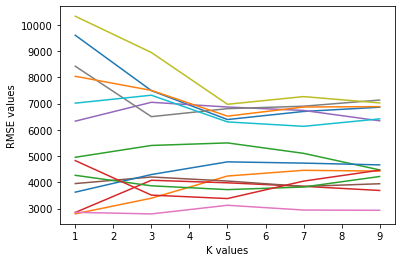

In [19]:
# Visualize rmse values depending on each K value
for k,v in k_result_value.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y)

plt.xlabel("K values")
plt.ylabel("RMSE values")

By both following scatter plot and result above, there is a pink line on the lowest position in the plot that represent for "engine-size" with the smallest rmse value is 2793.625 with k=3

## Multivariate KNN model

- In order to determine set of best features depending on values of rmse, we'll caculate the average of all rmse value relating each "k" value of each features

In [20]:
# Compute average of rmse (of each "k" value) of each feature
feature_avg_rmse = dict()
for k,v in k_result_value.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse

# Change to Series for a good view
feature_avg_rmse = pd.Series(feature_avg_rmse)
feature_avg_rmse.sort_values(inplace=True)
feature_avg_rmse

engine-size          2928.881183
width                3687.819374
wheel-base           3862.250544
city-mpg             3977.930803
curb-weight          3997.086009
highway-mpg          4044.366968
horsepower           4418.023664
length               5086.336846
compression-rate     6637.629174
height               6666.390724
bore                 7153.611868
peak-rpm             7163.863063
normalized-losses    7410.631004
stroke               8108.816022
dtype: float64

In [21]:
# Take out sets sorted features based on rmse value
sorted_features = feature_avg_rmse.index
sorted_features

Index(['engine-size', 'width', 'wheel-base', 'city-mpg', 'curb-weight',
       'highway-mpg', 'horsepower', 'length', 'compression-rate', 'height',
       'bore', 'peak-rpm', 'normalized-losses', 'stroke'],
      dtype='object')

### Best 2, 3, 4, 5 features (with lowest rmse)¶
- Using the best 2, 3, 4, 5, 6 features from the sorted features to train and test a multivariate k-nearest neighbors model using the average of rmse value relating to "k" values of each feature

In [22]:
# KNN model with different value of k
def knn_train_test(train_col, target_col, df):
    np.random.seed(1) 
    
    # Randomize the order of row in dataframe
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    # Generate training data (75%) and testing data (25%) 
    data_75_per = round(df.shape[0]*75/100)
    train_df = rand_df.iloc[:data_75_per]
    test_df = rand_df.iloc[data_75_per:]
    
    k_values = [1,3,5,7,9]
    k_rmses = dict()
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_col])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

Difference between **Multivariate** and **univariate model:**
- *Multi*: train_df\[train_col\] & test_df\[train_col\]
- *Uni*: train_df\[\[train_col\]\] & test_df\[\[train_col\]\]

In [23]:
k_rmse_result = dict()

for num_features in range(2,7):
    k_rmse_result["{} best features".format(num_features)] = knn_train_test(
        list(sorted_features[:num_features]),
        "price",
        numeric_cols
    )
    
k_rmse_result

{'2 best features': {1: 2006.9063256664472,
  3: 2430.5766887716172,
  5: 2604.113989517356,
  7: 2765.2513287997112,
  9: 2835.8395606640297},
 '3 best features': {1: 2083.8682012065924,
  3: 2485.4103940127607,
  5: 2655.767928415433,
  7: 2664.2889504384784,
  9: 2787.9324674322656},
 '4 best features': {1: 2399.7130453452137,
  3: 2648.217752040459,
  5: 2709.859768327505,
  7: 2645.5418099442822,
  9: 2671.742857257907},
 '5 best features': {1: 2219.383080948397,
  3: 2506.250576724788,
  5: 2536.558893146382,
  7: 2622.2030114125837,
  9: 2732.0692417070036},
 '6 best features': {1: 2133.979095492737,
  3: 2519.3118482809723,
  5: 2535.871781143518,
  7: 2566.8968757260673,
  9: 2731.981927167596}}

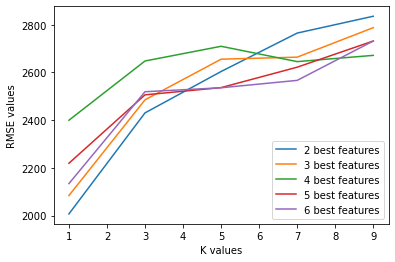

In [24]:
labels = list()

for k,v in k_rmse_result.items():
    x = list(v.keys())
    y = list(v.values())
    labels.append(k)
    plt.plot(x,y)
    
plt.legend(labels)
plt.xlabel("K values")
plt.ylabel("RMSE values")
plt.show()

- As a result, with 2 best features ("engine-size","width") as "train columns" and "K" value = 1, I'll get the smallest result of rmse (root mean square error) value (rmse=2006.9063)

## Hyperparameter optimization (K values)

In [25]:
# KNN model with different value of k
def knn_train_test(train_col, target_col, df):
    np.random.seed(1) 
    
    # Randomize the order of row in dataframe
    shuffle_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffle_index)
    
    # Generate training data (75%) and testing data (25%) 
    data_75_per = round(df.shape[0]*75/100)
    train_df = rand_df.iloc[:data_75_per]
    test_df = rand_df.iloc[data_75_per:]
    
    k_values = [i for i in range(1,25)]
    k_rmses = dict()
    
    for k in k_values:
        # Fit model using k nearest neighbors.
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_df[train_col], train_df[target_col])

        # Make predictions using model.
        predicted_labels = knn.predict(test_df[train_col])

        # Calculate and return RMSE.
        mse = mean_squared_error(test_df[target_col], predicted_labels)
        rmse = np.sqrt(mse)
        
        k_rmses[k] = rmse
    return k_rmses

In [26]:
k_rmse_result = dict()

for num_features in range(2,7):
    k_rmse_result["{} best features".format(num_features)] = knn_train_test(
        list(sorted_features[:num_features]),
        "price",
        numeric_cols
    )
    
k_rmse_result

{'2 best features': {1: 2006.9063256664472,
  2: 2191.1476251042513,
  3: 2430.5766887716172,
  4: 2488.4645366169075,
  5: 2604.113989517356,
  6: 2717.7121402426383,
  7: 2765.2513287997112,
  8: 2811.232302245316,
  9: 2835.8395606640297,
  10: 2909.763110942195,
  11: 2797.8224746818214,
  12: 2851.3148655001646,
  13: 2860.7705935835584,
  14: 2962.291571209212,
  15: 3087.1958790246313,
  16: 3193.0021128242306,
  17: 3309.276375265335,
  18: 3417.4366185566414,
  19: 3495.296298577224,
  20: 3582.8246830119947,
  21: 3650.0765330652393,
  22: 3718.1995655611126,
  23: 3792.871731394677,
  24: 3792.80917273709},
 '3 best features': {1: 2083.8682012065924,
  2: 2573.1913327617126,
  3: 2485.4103940127607,
  4: 2549.838328698508,
  5: 2655.767928415433,
  6: 2640.4561495654075,
  7: 2664.2889504384784,
  8: 2743.6167829846427,
  9: 2787.9324674322656,
  10: 2849.0300336781293,
  11: 2860.5184660670775,
  12: 2977.8998098958564,
  13: 3020.186464775285,
  14: 3186.251602236569,
  15

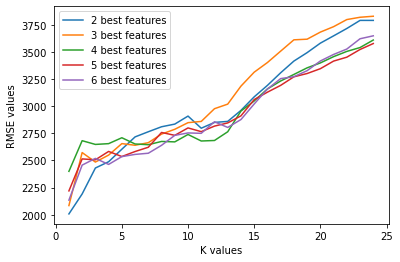

In [27]:
labels = list()

for k,v in k_rmse_result.items():
    x = list(v.keys())
    y = list(v.values())
    labels.append(k)
    plt.plot(x,y)
    
plt.legend(labels)
plt.xlabel("K values")
plt.ylabel("RMSE values")
plt.show()

### Result
The possible **most efficient** set of result is:
- Train features: \['engine-size', 'width'\]
- K = 1, rmse = 2006.9063

## K-fold cross-validation

**K-fold cross-validation** includes:
1. Splitting the full data set into **"k"** equal length partitions:
<br>
+) Selecting k-1 partitions as the training set.
<br>
+) Selecting the remaining partition as the test set
2. Training the model on the training set.
3. Using the trained model to predict labels on the test fold.
4. Computing the test fold's error metric
5. Repeating all of the above steps k-1 times, until each partition has been used as the test set
for an iteration
6. Calculating the mean of the k error values

**Purpose:**
- Bias describes rmses which is "root mean square error" between predicted values and true values.
- Variance is the variability of list of rmses values
- I need low bias and low variance when creating machine learning models

In [28]:
from sklearn.model_selection import cross_val_score, KFold

In [42]:
# "train_col": must be list of features columns (>1 columns)
def K_fold_cross_validation(train_col, target_col, df, fold):
    # "fold": number of splitting part
    # "random_state": specify random seed when "shuffle"=True
    kf = KFold(fold, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=1) # Using most efficient K value
    
    # cross_val_score() perfrom K-fold cross-validation (K: # of parts by splitting data)
    # cross_val_score() return list of mses in which each mse value related to the ith part of data
    # being considereK d as test part 
    mses = cross_val_score(knn, df[train_col], df[target_col],
                          scoring="neg_mean_squared_error", cv=kf)
    rmses = np.sqrt(np.absolute(mses))
    
    # Avg list of rmse
    rmses_avg = np.mean(rmses)
    # Standard deviation of list of rmses
    rmses_std = np.std(rmses)
    return (rmses_avg, rmses_std)

Function **K_fold_cross_validation()**:
- **Input**: train_col(features), target_col, df, fold(# of splitting parts)
- **Output**: rmses_avg (Average of list of rmses values), rmses_std (standard deviation of this list)

In [43]:
# Generate list of folds
num_folds = [i for i in range(3,25,2)]
rmses_avgs = list()
rmses_stds = list()

for fold in num_folds:
    rmses_avg, rmses_std = K_fold_cross_validation(
        ["engine-size", "width"], # Using most efficient features above
        "price",
        numeric_cols,
        fold
        )
    rmses_avgs.append(rmses_avg)
    rmses_stds.append(rmses_avg)
    print("{} fold -> rmses_avg: {} & rmses_std: {}".format(fold, rmses_avg, rmses_std))

3 fold -> rmses_avg: 3165.3223577307704 & rmses_std: 168.22910967267774
5 fold -> rmses_avg: 2686.7738182068238 & rmses_std: 457.689792079675
7 fold -> rmses_avg: 2599.552574708211 & rmses_std: 457.45039301199125
9 fold -> rmses_avg: 2479.2289853909206 & rmses_std: 627.9992717325268
11 fold -> rmses_avg: 2592.909698821419 & rmses_std: 762.7274066061341
13 fold -> rmses_avg: 2687.856005136514 & rmses_std: 630.8264792584649
15 fold -> rmses_avg: 2558.537841900929 & rmses_std: 760.8937904063116
17 fold -> rmses_avg: 2546.14439290691 & rmses_std: 740.9702518113755
19 fold -> rmses_avg: 2611.5488158020116 & rmses_std: 826.9568703736779
21 fold -> rmses_avg: 2556.8595548707494 & rmses_std: 867.6311914581117
23 fold -> rmses_avg: 2472.523551627956 & rmses_std: 946.0574562668604


With 9 folds, I've got
- rmses_avg = 2479.2289 (Average value of list of rmse values)
- rmses_std = 627.9992 (standard deviation value of list of rmse values)
<br>

--> **9 folds** is the most efficient number of folds values

In [48]:
# "train_col": must be list of features columns (>1 columns)
def K_fold_cross_validation(train_col, target_col, df, fold):
    # "fold": number of splitting part
    # "random_state": specify random seed when "shuffle"=True
    kf = KFold(fold, shuffle=True, random_state=1)
    knn = KNeighborsRegressor(n_neighbors=1) # Using most efficient K value
    
    # cross_val_score() perfrom K-fold cross-validation (K: # of parts by splitting data)
    # cross_val_score() return list of mses in which each mse value related to the ith part of data
    # being considereK d as test part 
    mses = cross_val_score(knn, df[train_col], df[target_col],
                          scoring="neg_mean_squared_error", cv=kf)
    
    return np.sqrt(np.absolute(mses))

In [55]:
rmses = K_fold_cross_validation(
    ["engine-size", "width"], # Using most efficient features above
    "price",
    numeric_cols,
    fold=9
    )
# Transform to Series for easy view
rmses = pd.Series(rmses, index=range(1,10))
rmses

1    1282.805960
2    3355.818361
3    2501.961118
4    3118.258663
5    2651.669620
6    2109.706324
7    3090.029545
8    2342.106744
9    1860.704534
dtype: float64

In [58]:
rmses.index 

RangeIndex(start=1, stop=10, step=1)

<ipython-input-68-e62d4c1587ea>:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


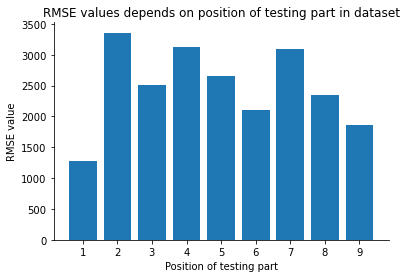

In [68]:
# Visualize rmses values with 9 folds
fig,ax = plt.subplots()
# Sketching the bar plot
ax.bar(x=list(rmses.index), height=rmses)

# Set the label for the plot
ax.set_xlabel("Position of testing part")
ax.set_ylabel("RMSE value")
ax.set_title("RMSE values depends on position of testing part in dataset")

# Turn off the top and right lines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set xtick
ax.set_xticks(rmses.index)

fig.show()

### Result
With most efficient of fold (9 folds), K values (K=1), features (\["engine-size", "width"\]):
- The smallest value that we got is **rmse = 1282.8059**
- When we devide data into 9 same-sized parts (after shuffle all observations), and choose 1st part as testing set, the remaining data are training set 